# Homework 3: Coding Part
Due: Mar 23, 2023 at 11:00 pm

Submit through Gradescope. Please upload .ipynb

In [1]:
# customary imports:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
from sklearn.model_selection import StratifiedKFold

# 1. Download the white blood cell classification data
The data is hosted online, so we can use the linux command `wget` to download it. If you run into any issues with the data download, please just share your challenges via Slack and we can help sort them out.

In [2]:
# if this breaks please contact the TAs
!wget -O data.zip https://data.mendeley.com/public-files/datasets/snkd93bnjr/files/2fc38728-2ae7-4a62-a857-032af82334c3/file_downloaded
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_292483.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_935950.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_890863.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_519370.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_215077.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_388154.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_968896.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_34345.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_349907.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_245683.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_785122.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_615525.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_714613.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_904757.jpg  
  inflating: PBC_dataset_n

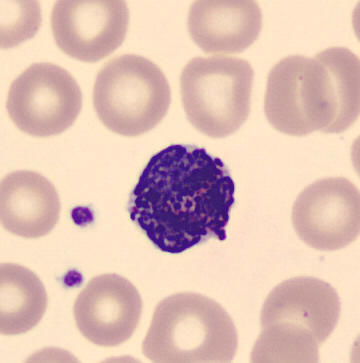

In [3]:
# loading a sample image
sample_image = Image.open("PBC_dataset_normal_DIB/basophil/BA_100102.jpg")
sample_image

(12432, 128, 128, 1) (12432, 8)
(3109, 128, 128, 1) (3109, 8)


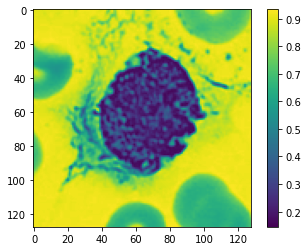

In [4]:
def load_and_crop(image_path, crop_size, normalized=True):
    image = Image.open(image_path).resize([200,200])
    width, height = image.size   # Get dimensions
    left = (width - crop_size)/2
    top = (height - crop_size)/2
    right = (width + crop_size)/2
    bottom = (height + crop_size)/2
    # Crop the center of the image
    image = ImageOps.grayscale(image.crop((left, top, right, bottom)))
    if normalized:
        return np.array(image).astype(np.float32) / 255.0
    else:
        return np.array(image).astype(np.float32)

# code to load all the data, assuming dataset is at PBC_dataset_normal_DIB relative path
cell_types = ['basophil', 'eosinophil', 'erthroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
cell_inds = np.arange(0, len(cell_types))
x_data = []
y_data = []
for cell_ind in cell_inds:
    all_images = glob.glob(os.path.join('PBC_dataset_normal_DIB', cell_types[cell_ind], '*.jpg'))
    x_data += [load_and_crop(image_path, 128) for image_path in all_images]
    y_data += [cell_ind]*len(all_images)

# adding a fake color channel
x_data = np.array(x_data).reshape(-1, 128, 128, 1)
y_data = np.array(y_data)

folder = StratifiedKFold(5, shuffle=True)
x_indices = np.arange(0, len(x_data))
train_indices, val_indices = folder.split(x_indices, y_data).__next__()
# shuffling
np.random.shuffle(train_indices)

x_train = x_data[train_indices]
y_train = np.eye(len(cell_types))[y_data[train_indices]]

x_val = x_data[val_indices]
y_val = np.eye(len(cell_types))[y_data[val_indices]]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

plt.imshow(x_train[0,:,:,0])
plt.colorbar()

# 2. Define a keras model
You can either use the sequential model class, or the functional model declaration

(a) Please define your model with the following layers:
1. A convolutional layer with a 5x5 kernel and stride of 1
2. A convolutional layer with a 5x5 kernel and stride of 1
3. A pooling layer
4. A convolutional layer with a 5x5 kernel and stride of 1
5. A convolutional layer with a 5x5 kernel and stride of 1
6. A pooling layer
7. A Dense layer
8. Output layer of size 8

You are free to choose the sizes, number of channels and activations (i.e., the employed non-linearity) for each of the layers.

(b) Now, please comment out the pooling layer in step 3 and step 6, and instead increase the stride in the appropriate layers to achieve the same down-sampling effect (i.e., to reduce the size of the tensor in the same way as pooling) 

(c) After defining the model, you should define an optimizer and set a learning rate. You also should pick a loss function.

(d) Run the optimization for 10-15 epochs and monitor the training and validation loss and accuracy. After training is done, please plot two graphs, one showing the training and validation losses as two curves within the same plot, and a second graph that shows the the training and validation accuracies as two curves within the same plot. For both plots, please let epoch be the horizontal axis.

At the end of training, you should be able obtain a validation accuracy better than 75%. Even though you are not getting that it should be fine.

You can refer to the notebook from the TA session or any online TensorFlow resources for guidance.

## (a) Please define your model with the following layers - 5 points
1. A convolutional layer with a 5x5 kernel and stride of 1
2. A convolutional layer with a 5x5 kernel and stride of 1
3. A pooling layer
4. A convolutional layer with a 5x5 kernel and stride of 1
5. A convolutional layer with a 5x5 kernel and stride of 1
6. A pooling layer
7. A Dense layer
8. Output layer of size 8

You are free to choose the sizes, number of channels and activations (i.e., the employed non-linearity) for each of the layers.

In [5]:
image_size = (128, 128, 1)
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(image_size),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),

    # max pooling layer:
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),

    # max pooling layer:
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),

    # output layer:
    tf.keras.layers.Dense(8, activation='softmax')
])

## (b) Now, please comment out the pooling layer in step 3 and step 6, and instead increase the stride in the appropriate layers to achieve the same down-sampling effect (i.e., to reduce the size of the tensor in the same way as pooling) - 5 points

In [6]:
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(image_size),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),

    # max pooling layer:
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),

    # max pooling layer:
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),

    # output layer:
    tf.keras.layers.Dense(8, activation='softmax')
])

## (c) After defining the model, you should define an optimizer and set a learning rate. You also should pick a loss function. - 5 points

In [7]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

## (d) Run the optimization for 10-15 epochs and monitor the training and validation loss and accuracy. - 5 points

At the end of training, you should be able obtain an accuracy better than 75%.  Even though you are not getting that it should be fine.

In [8]:
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

Epoch 1/10
389/389 [==============================] - 15s 12ms/step - loss: 1.3397 - accuracy: 0.4866 - val_loss: 1.0024 - val_accuracy: 0.6262
Epoch 2/10
389/389 [==============================] - 4s 9ms/step - loss: 0.9093 - accuracy: 0.6584 - val_loss: 0.8735 - val_accuracy: 0.6996
Epoch 3/10
389/389 [==============================] - 3s 8ms/step - loss: 0.8408 - accuracy: 0.6876 - val_loss: 0.8496 - val_accuracy: 0.7099
Epoch 4/10
389/389 [==============================] - 4s 10ms/step - loss: 0.7963 - accuracy: 0.7062 - val_loss: 0.8201 - val_accuracy: 0.7076
Epoch 5/10
389/389 [==============================] - 4s 9ms/step - loss: 0.6709 - accuracy: 0.7568 - val_loss: 0.6589 - val_accuracy: 0.7787
Epoch 6/10
389/389 [==============================] - 3s 9ms/step - loss: 0.5891 - accuracy: 0.7828 - val_loss: 0.5978 - val_accuracy: 0.7996
Epoch 7/10
389/389 [==============================] - 4s 9ms/step - loss: 0.5450 - accuracy: 0.7980 - val_loss: 0.5944 - val_accuracy: 0.7996
Epo

## (e) After training is done, please plot two graphs, one showing the training and validation losses as two curves within the same plot, and a second graph that shows the the training and validation accuracies as two curves within the same plot. For both plots, please let epoch be the horizontal axis. - 5 points

In [9]:
def plot_train_val_loss(hist):
    plt.title("Learning Curve")
    plt.plot(np.arange(10),hist.history.get('loss'), label="Train")
    plt.plot(np.arange(10),hist.history.get('val_loss'), label="Test")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [10]:
def plot_train_val_acc(hist):
    plt.title("Learning Curve")
    plt.plot(np.arange(10),hist.history.get('accuracy'), label="Train")
    plt.plot(np.arange(10),hist.history.get('val_accuracy'), label="Test")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

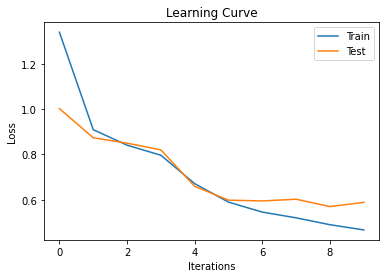

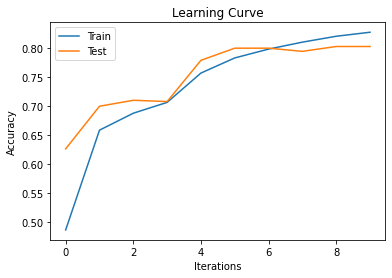

In [11]:
# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

# 3. How many weight parameters does your network have? - 5 points
First try calculating this number by hand, and show your work (please type out the multiplications that you are performing to arrive at the final number.) Then, please verify the answer using Keras's autogenerated model summary.

|     Layer     |  Output Shape  | # Param Calc. | # Parameters |
|---|---|---|---|
|Image Input|128 X 128 X 1 | NA | NA |
|Conv2D Layer 1| 124 X 124 X 6 |((5 * 5 * 1) + 1) * 6| 156|
|Conv2D Layer 2| 60 X 60 X 6 |((5 * 5 * 6) + 1) * 6 |906|
|Conv2D Layer 3| 56 X 56 X 6 |((5 * 5 * 6) + 1) * 6 |906|
|Conv2D Layer 4| 26 X 26 X 6 |((5 * 5 * 6) + 1) * 6 |906|
|Flatten| 26 X 26 X 6 = 4056 | NA | NA |
|Dense Layer| 128 | (4056 + 1) * 128 | 519296 |
|Output Layer| 8 | (128 + 1) * 8 | 1032 |

#### Total Parameters = 156 + 906 + 906 + 906 + 519,296 + 1032 = 523,202

In [12]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 6)       156       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 6)         906       
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 6)         906       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 6)         906       
                                                                 
 flatten_1 (Flatten)         (None, 4056)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               519296    
                                                                 
 dense_3 (Dense)             (None, 8)                

# 4. Visualize filters
You can obtain weights in individual layers by running 
```
your_model_variable.layers[layer_index].get_weights()
```


## (a) Plot all convolution kernels (i.e., each set of 5x5 weights) in your first convolutional layer. - 5 points

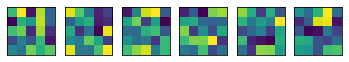

In [13]:
# retrieve weights from the first layer
filter_weights, bias_weights = cnn_model.layers[0].get_weights()

# normalize filter values to visualize them
filter_weights_norm = (filter_weights-np.min(filter_weights))/(np.max(filter_weights)-np.min(filter_weights))

# plot the filter
ix = 1
for i in range(6): 
    f = filter_weights_norm[:, :, :, i]
    ax = plt.subplot(1, 6, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f)
    ix += 1
plt.show()

## (b) Also plot some of the convolutional weights in the second layer. - 5 points

Filter Channel: 1


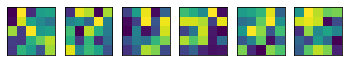

Filter Channel: 2


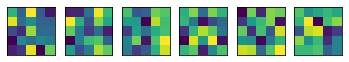

Filter Channel: 3


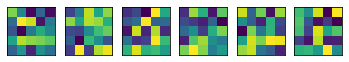

Filter Channel: 4


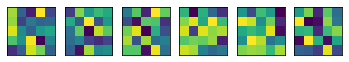

Filter Channel: 5


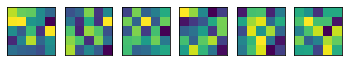

Filter Channel: 6


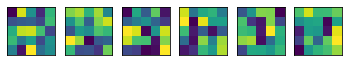

In [14]:
# retrieve weights from the second layer
filter_weights, bias_weights = cnn_model.layers[1].get_weights()

# normalize filter values to visualize them
filter_weights_norm = (filter_weights-np.min(filter_weights))/(np.max(filter_weights)-np.min(filter_weights))

# plot the filters
for i in range(6):
    f = filter_weights_norm[:, :, :, i]
    ix = 1
    print(f"Filter Channel: {i+1}")
    for j in range(6):
        ax = plt.subplot(1, 6, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j])
        ix += 1
    plt.show()

# 5. Try playing with the learning rate

## (a) Try to increase and decrease the learning rate and plot the training and validation loss and accuracy curves. Please use three different learning rates. - 5 points

Epoch 1/10
389/389 [==============================] - 5s 10ms/step - loss: 0.5504 - accuracy: 0.7958 - val_loss: 0.5658 - val_accuracy: 0.7983
Epoch 2/10
389/389 [==============================] - 4s 9ms/step - loss: 0.4684 - accuracy: 0.8222 - val_loss: 0.5311 - val_accuracy: 0.8122
Epoch 3/10
389/389 [==============================] - 3s 8ms/step - loss: 0.4391 - accuracy: 0.8354 - val_loss: 0.4503 - val_accuracy: 0.8495
Epoch 4/10
389/389 [==============================] - 3s 9ms/step - loss: 0.3982 - accuracy: 0.8506 - val_loss: 0.4920 - val_accuracy: 0.8253
Epoch 5/10
389/389 [==============================] - 4s 10ms/step - loss: 0.3745 - accuracy: 0.8615 - val_loss: 0.4707 - val_accuracy: 0.8363
Epoch 6/10
389/389 [==============================] - 3s 9ms/step - loss: 0.3440 - accuracy: 0.8711 - val_loss: 0.4457 - val_accuracy: 0.8385
Epoch 7/10
389/389 [==============================] - 3s 8ms/step - loss: 0.3117 - accuracy: 0.8851 - val_loss: 0.4044 - val_accuracy: 0.8675
Epoc

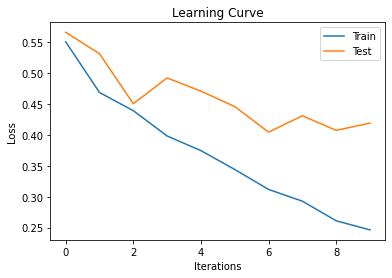

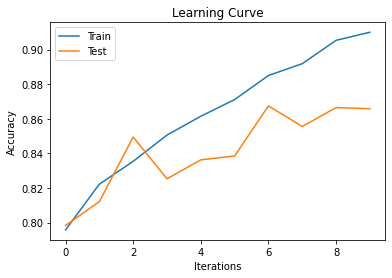

In [15]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

Epoch 1/10
389/389 [==============================] - 6s 11ms/step - loss: 0.3141 - accuracy: 0.8850 - val_loss: 0.3936 - val_accuracy: 0.8746
Epoch 2/10
389/389 [==============================] - 4s 9ms/step - loss: 0.2543 - accuracy: 0.9045 - val_loss: 0.4620 - val_accuracy: 0.8472
Epoch 3/10
389/389 [==============================] - 3s 9ms/step - loss: 0.2676 - accuracy: 0.9014 - val_loss: 0.4120 - val_accuracy: 0.8649
Epoch 4/10
389/389 [==============================] - 3s 8ms/step - loss: 0.1973 - accuracy: 0.9298 - val_loss: 0.4918 - val_accuracy: 0.8569
Epoch 5/10
389/389 [==============================] - 4s 9ms/step - loss: 0.1627 - accuracy: 0.9416 - val_loss: 0.4262 - val_accuracy: 0.8688
Epoch 6/10
389/389 [==============================] - 3s 9ms/step - loss: 0.1385 - accuracy: 0.9496 - val_loss: 0.5286 - val_accuracy: 0.8446
Epoch 7/10
389/389 [==============================] - 3s 8ms/step - loss: 0.1147 - accuracy: 0.9583 - val_loss: 0.5479 - val_accuracy: 0.8488
Epoch

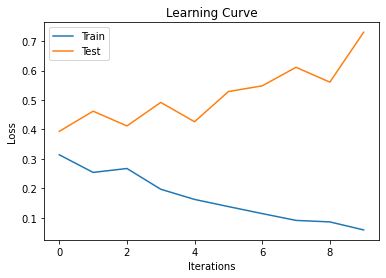

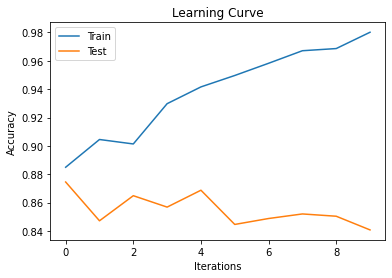

In [16]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

Epoch 1/10
389/389 [==============================] - 5s 10ms/step - loss: 0.1159 - accuracy: 0.9587 - val_loss: 0.6566 - val_accuracy: 0.8324
Epoch 2/10
389/389 [==============================] - 3s 9ms/step - loss: 0.0877 - accuracy: 0.9676 - val_loss: 0.6343 - val_accuracy: 0.8463
Epoch 3/10
389/389 [==============================] - 4s 9ms/step - loss: 0.0731 - accuracy: 0.9739 - val_loss: 0.9553 - val_accuracy: 0.8189
Epoch 4/10
389/389 [==============================] - 3s 8ms/step - loss: 0.0848 - accuracy: 0.9723 - val_loss: 0.6237 - val_accuracy: 0.8273
Epoch 5/10
389/389 [==============================] - 3s 9ms/step - loss: 0.0732 - accuracy: 0.9751 - val_loss: 0.9006 - val_accuracy: 0.8109
Epoch 6/10
389/389 [==============================] - 4s 9ms/step - loss: 0.0455 - accuracy: 0.9840 - val_loss: 0.8923 - val_accuracy: 0.8337
Epoch 7/10
389/389 [==============================] - 3s 9ms/step - loss: 0.0586 - accuracy: 0.9793 - val_loss: 1.0100 - val_accuracy: 0.8289
Epoch

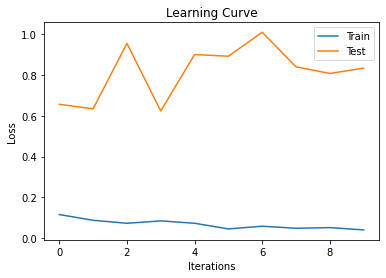

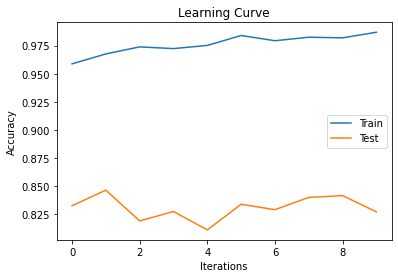

In [17]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

## (b) Please comment on any trends that you can identify between how the plots change as a function of learning rate. Specifically, what happens to the slopes of the training loss and accuracy as a function of learning rate? - 5 points

As we increase the learning rate, we observe that the train loss decreases and train accuracy increases at a much faster rate. But, we do not see a similar decrease and increase in the validation curves which shows that the model is overfitting and is not able to generalize well on unseen data.

For the slopes, we see that as the learning rate is increased, the slopes for both train accuracy and loss become less steep which makes sense as the model is able to improve it's performance quickly when given a higher learning rate.

# 6. Adding Batch Norm - 5 points
Fix a value of the learning rate and try adding Batch Normalization after the second and fourth conv layers. Please plot the training and validation loss and accuracy curves. Does it improve the performance of your model? Explain briefly.

In [18]:
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(image_size),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),

    # batch norm layer:
    tf.keras.layers.BatchNormalization(),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),

    # batch norm layer:
    tf.keras.layers.BatchNormalization(),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),

    # output layer:
    tf.keras.layers.Dense(8, activation='softmax')
])

Epoch 1/10
389/389 [==============================] - 8s 11ms/step - loss: 0.8635 - accuracy: 0.6775 - val_loss: 1.3752 - val_accuracy: 0.5568
Epoch 2/10
389/389 [==============================] - 3s 9ms/step - loss: 0.5282 - accuracy: 0.8053 - val_loss: 0.6173 - val_accuracy: 0.7649
Epoch 3/10
389/389 [==============================] - 3s 9ms/step - loss: 0.4034 - accuracy: 0.8568 - val_loss: 0.5012 - val_accuracy: 0.8170
Epoch 4/10
389/389 [==============================] - 4s 11ms/step - loss: 0.3177 - accuracy: 0.8914 - val_loss: 0.4565 - val_accuracy: 0.8389
Epoch 5/10
389/389 [==============================] - 4s 9ms/step - loss: 0.2602 - accuracy: 0.9111 - val_loss: 0.4881 - val_accuracy: 0.8260
Epoch 6/10
389/389 [==============================] - 3s 9ms/step - loss: 0.1952 - accuracy: 0.9402 - val_loss: 0.4374 - val_accuracy: 0.8469
Epoch 7/10
389/389 [==============================] - 4s 10ms/step - loss: 0.1489 - accuracy: 0.9594 - val_loss: 0.4448 - val_accuracy: 0.8520
Epo

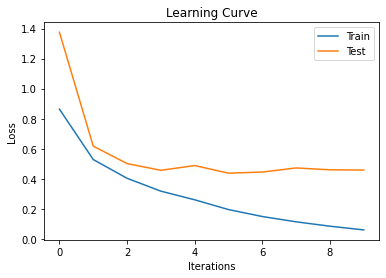

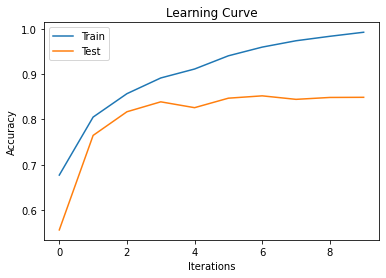

In [19]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

Adding batch normalization layers didn't affect the final performance of the model on the test data too much but we do see that the model was able to train more smoothly without any spikes in the loss or accuracy curves.

# 7. Data Augmetation - 5 points
Now, instead of giving the dataset directly to the network, augment it first using:
```
keras.preprocessing.image.ImageDataGenerator
```
Specifically, use vertical and horizontal flips and 20 degrees rotation. Feel free to consult the documentation for this function.

Please plot the training and validation loss and accuracy curves. What effect does this have on your model?

[Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [20]:
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20)

Epoch 1/10
389/389 [==============================] - 23s 54ms/step - loss: 0.3927 - accuracy: 0.8641 - val_loss: 0.4280 - val_accuracy: 0.8463
Epoch 2/10
389/389 [==============================] - 20s 51ms/step - loss: 0.3430 - accuracy: 0.8780 - val_loss: 0.4166 - val_accuracy: 0.8511
Epoch 3/10
389/389 [==============================] - 21s 53ms/step - loss: 0.3144 - accuracy: 0.8868 - val_loss: 0.4214 - val_accuracy: 0.8530
Epoch 4/10
389/389 [==============================] - 21s 53ms/step - loss: 0.2928 - accuracy: 0.8900 - val_loss: 0.3196 - val_accuracy: 0.8900
Epoch 5/10
389/389 [==============================] - 20s 51ms/step - loss: 0.2668 - accuracy: 0.9052 - val_loss: 0.3470 - val_accuracy: 0.8820
Epoch 6/10
389/389 [==============================] - 21s 54ms/step - loss: 0.2537 - accuracy: 0.9080 - val_loss: 0.2805 - val_accuracy: 0.9048
Epoch 7/10
389/389 [==============================] - 21s 53ms/step - loss: 0.2412 - accuracy: 0.9146 - val_loss: 0.2933 - val_accuracy:

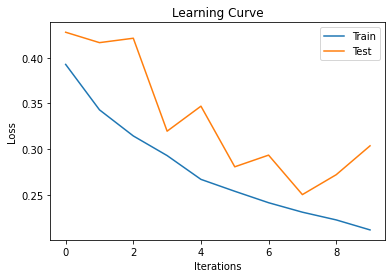

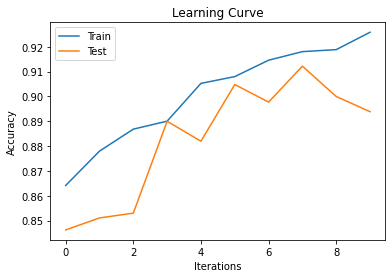

In [21]:
# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(data_aug.flow(x_train, y_train, batch_size=32),
              epochs=10,
              validation_data=data_aug.flow(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

# 8. Custom layer for Fourier filtering

Note: this problem requires some careful bug-checking

Now, we will implement a custom layer that doesn't exist in keras -- Fourier filtering. Your layer should apply the 2D Fourier transform (`tf.signal.fft2d`) to each channel of the input, multiply element-wise by an optimizable mask (the same one for each channel), apply the 2D inverse Fourier transform (`tf.signal.ifft2d`), and then take the absolute value. Note: 
- You will have to use the tf versions of all operations, NOT the numpy versions. 
- The fft2d operations in tensorflow are done on the LAST two dimensions, which is at odds with the default dimension ordering of CNNs. Thus, you will need to use `tf.transpose` on the input and then transpose back after the filtering operation.
- Use dtype `tf.complex64`, which is basically a combination of two `tf.float32`s. You will have to explicitly cast between these two data types, because the input/output will be `tf.float32`, but intermediate steps will be `tf.complex64`.

Initialize your optimizable Fourier masks using a binary circular mask (1's inside the circle, 0's outside), with a radius given by 1/4 of the square image dimension (you can round if not divisible by 4). 

After defining this custom layer, copy your previously defined CNN above and insert this new layer as the first layer. To verify that your layer is working correctly, plot some example outputs of the first layer.

In [22]:
# There is no 2D fftshift in tf. Please use this instead.
def tf_fftshift2(A):
    # 2D fftshift
    # apply fftshift to the last two dims
    s = tf.shape(A)
    s1 = s[-2]
    s2 = s[-1]
    A = tf.concat([A[..., s1//2:, :], A[..., :s1//2, :]], axis=-2)
    A = tf.concat([A[..., :, s2//2:], A[..., :, :s2//2]], axis=-1)
    return A

## (a) Create circular mask - 5 points

In [23]:
def create_circular_mask(h, w, radius):

    # calculate center
    center = (int(w/2), int(h/2))

    # create a grid of the given height and width
    Y, X = tf.meshgrid(tf.range(h), tf.range(w))
    X = tf.cast(X, tf.float32)
    Y = tf.cast(Y, tf.float32)

    # calculate distance of every element from the center
    dist_from_center = tf.sqrt(tf.math.squared_difference(X, center[0]) + tf.math.squared_difference(Y, center[1]))

    # compute the mask
    mask = tf.math.less_equal(dist_from_center, radius)
    mask = tf.cast(mask, tf.float32)
    
    return mask

## (b) Create FourierFilter class - 25 points

In [24]:
class FourierFilter(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
        # create a mask of the given input shape
        temp = create_circular_mask(input_shape[1], input_shape[2], round(input_shape[1]/4))

        # cast to complex and expand to the number of channels
        temp = tf.cast(temp, tf.complex64)
        temp = tf.expand_dims(temp, axis=-1)
        temp = tf.repeat(temp, repeats=input_shape[3], axis=2)

        # create a trainable variable
        self.mask = tf.Variable(temp, trainable=True)

    def get_mask(self):
        return self.mask

    def call(self, input):
        # transpose the input to [batch, channel, height, width]
        input_transpose = tf.transpose(input, perm=[0, 3, 1, 2])

        # apply fourier transform
        input_transpose_fft = tf.signal.fft2d(tf.cast(input_transpose, tf.complex64))

        # apply fftshift
        input_transpose_fft_center = tf_fftshift2(input_transpose_fft)

        # transpose back to [batch, height, width, channel]
        input_fft_center = tf.transpose(input_transpose_fft_center, perm=[0, 2, 3, 1])
        
        # apply the mask
        input_fft_center_masked = input_fft_center * self.get_mask()

        # transpose to [batch, channel, height, width]
        input_fft_center_masked_transpose = tf.transpose(input_fft_center_masked, perm=[0, 3, 1, 2])

        # apply fftshift again
        input_fft_masked_transpose = tf_fftshift2(input_fft_center_masked_transpose)

        # apply inverse fourier transform
        input_masked_transpose = tf.signal.ifft2d(input_fft_masked_transpose)

        # transpose back to [batch, height, width, channel]
        input_masked = tf.transpose(input_masked_transpose, perm=[0, 2, 3, 1])

        # take the absolute value
        input_masked = tf.math.abs(input_masked)
        
        return input_masked

## (c) Training. - 5 points

Epoch 1/10
389/389 [==============================] - 9s 15ms/step - loss: 0.8651 - accuracy: 0.6708 - val_loss: 1.7444 - val_accuracy: 0.3995
Epoch 2/10
389/389 [==============================] - 6s 16ms/step - loss: 0.5023 - accuracy: 0.8139 - val_loss: 0.5372 - val_accuracy: 0.8051
Epoch 3/10
389/389 [==============================] - 7s 19ms/step - loss: 0.3804 - accuracy: 0.8657 - val_loss: 0.5003 - val_accuracy: 0.8167
Epoch 4/10
389/389 [==============================] - 8s 20ms/step - loss: 0.2940 - accuracy: 0.8988 - val_loss: 0.4892 - val_accuracy: 0.8266
Epoch 5/10
389/389 [==============================] - 11s 29ms/step - loss: 0.2274 - accuracy: 0.9235 - val_loss: 0.4471 - val_accuracy: 0.8443
Epoch 6/10
389/389 [==============================] - 13s 33ms/step - loss: 0.1751 - accuracy: 0.9495 - val_loss: 0.4814 - val_accuracy: 0.8382
Epoch 7/10
389/389 [==============================] - 14s 37ms/step - loss: 0.1335 - accuracy: 0.9661 - val_loss: 0.4697 - val_accuracy: 0.8

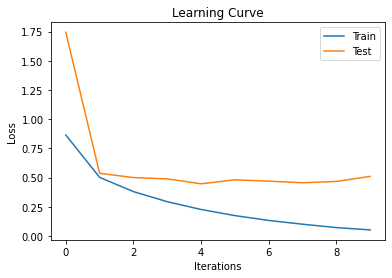

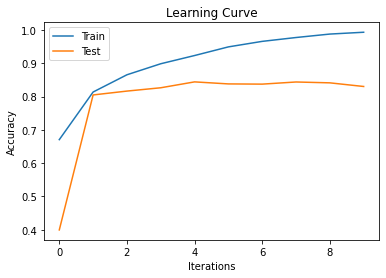

In [25]:
# model
cnn_model = tf.keras.models.Sequential([
    # fourier filter layer
    FourierFilter(),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),

    # batch norm layer:
    tf.keras.layers.BatchNormalization(),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(1, 1)),
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', strides=(2, 2)),

    # batch norm layer:
    tf.keras.layers.BatchNormalization(),

    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),

    # output layer:
    tf.keras.layers.Dense(8, activation='softmax')
])

# compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# train the model
hist = cnn_model.fit(x_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(x_val, y_val))

# plot the loss and accuracy curves
plot_train_val_loss(hist)
plot_train_val_acc(hist)

## (d) Please compare the masks before and after training. - 5 points

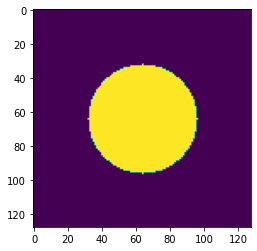

In [26]:
# create original mask which is initialized befor training
mask_original = create_circular_mask(128, 128, 32)
mask_original = tf.cast(mask_original, tf.complex64)
mask_original = tf.expand_dims(mask_original, axis=-1)

# normalize mask values to visualize
mask_original_norm = (mask_original-np.min(mask_original))/(np.max(mask_original)-np.min(mask_original))
mask_original_norm_abs = tf.math.abs(mask_original_norm)

# plot the mask
plt.imshow(mask_original_norm_abs);

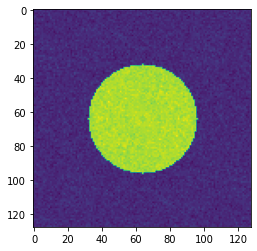

In [27]:
# retrieve trained mask from the model
mask_trained = cnn_model.layers[0].get_weights()[0]

# normalize mask values to visualize
mask_trained_norm = (mask_trained-np.min(mask_trained))/(np.max(mask_trained)-np.min(mask_trained))
mask_trained_norm_abs = tf.math.abs(mask_trained_norm)

# plot the mask
plt.imshow(mask_trained_norm_abs);